# Predicting term deposit in bank

### Executive summary

In this case, the data pertains to a direct marketing campaign (phone calls) by a Portuguese banking institution. Classification goals include predicting whether the client will subscribe to a term deposit (variable y).

This dataset was found at UCI Machine Learning Repository, which is an amazing resource for publicly available datasets. Among the four dataset variants, we chose "bank.csv", which consists of 4521 data points with 16 independent variables, 5 of which are numeric and 11 categorical. Below is a list of the features available to us:

Data on bank clients:


1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - balance: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):

16 - y - has the client subscribed a term deposit? (binary: 'yes','no')


### Issues and challenges: 

We are dealing with binary classification here. There are two classes: "yes" indicates that the customer subscribed to a term deposit, and "no" indicates that the customer did not subscribe.

In [2]:
import pandas as pd

In [3]:
dataset_bank_raw = pd.read_csv("https://raw.githubusercontent.com/sumitraju/data-science/main/bank_logistic_regression/data/bank.csv", sep=";")
dataset_bank = dataset_bank_raw.copy()
dataset_bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Exploratory Data Analysis

In [4]:
dataset_bank.shape

(4521, 17)

In [5]:
dataset_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
dataset_bank.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [7]:
dataset_bank.describe(exclude='object')

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
dataset_bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Unique values

In [9]:
unique_values_job = dataset_bank["job"].unique()
unique_values_marital = dataset_bank["marital"].unique()
unique_values_education = dataset_bank["education"].unique()
unique_values_default = dataset_bank["default"].unique()
unique_values_housing = dataset_bank["housing"].unique()
unique_values_loan = dataset_bank["loan"].unique()
unique_values_contact = dataset_bank["contact"].unique()
unique_values_month = dataset_bank["month"].unique()
unique_values_poutcome = dataset_bank["poutcome"].unique()
print("unique_values_job")
print(unique_values_job)
print("------------------------")
print("unique_values_marital")
print(unique_values_marital)
print("------------------------")
print("unique_values_education")
print(unique_values_education)
print("------------------------")
print("unique_values_default")
print(unique_values_default)
print("------------------------")
print("unique_values_housing")
print(unique_values_housing)
print("------------------------")
print("unique_values_loan")
print(unique_values_loan)
print("------------------------")
print("unique_values_contact")
print(unique_values_contact)
print("------------------------")
print("unique_values_month")
print(unique_values_month)
print("------------------------")
print("unique_values_poutcome")
print(unique_values_poutcome)

unique_values_job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
------------------------
unique_values_marital
['married' 'single' 'divorced']
------------------------
unique_values_education
['primary' 'secondary' 'tertiary' 'unknown']
------------------------
unique_values_default
['no' 'yes']
------------------------
unique_values_housing
['no' 'yes']
------------------------
unique_values_loan
['no' 'yes']
------------------------
unique_values_contact
['cellular' 'unknown' 'telephone']
------------------------
unique_values_month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
------------------------
unique_values_poutcome
['unknown' 'failure' 'other' 'success']


### Visualizations

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [14]:
import math

In [44]:
def count_plots(listOfColumns):
    totalCols=3
    totalRows=math.ceil(len(listOfColumns)/totalCols)
    widthForEachGraph=3
    fig = plt.figure(figsize=(totalCols*3,totalRows*3))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    for x in range(0, len(listOfColumns), 1):
        y_values_distribution = dataset_bank["y"].value_counts()
        print("-----------"+listOfColumns[x] +"------------")
        print(y_values_distribution)
        print("-----------------------")
        print(int(str(totalRows)+str(totalCols)+str(x+1)))
        globals()[f"ax_count_plots_{x}"] = fig.add_subplot(int(str(totalRows)+str(totalCols)+str(x+1)))
        globals()[f"ax_count_plots_{x}"].set_title('Colour vs Price')
        globals()[f"ax_count_plots_{x}"].set_xlabel('Colour')
        globals()[f"ax_count_plots_{x}"].set_ylabel('Price')
        sns.countplot(x=listOfColumns[x], hue = 'y', data= dataset_bank, ax=globals()[f"ax_count_plots_{x}"])
        
    plt.show()
        

-----------job------------
no     4000
yes     521
Name: y, dtype: int64
-----------------------
231
-----------marital------------
no     4000
yes     521
Name: y, dtype: int64
-----------------------
232
-----------education------------
no     4000
yes     521
Name: y, dtype: int64
-----------------------
233
-----------default------------
no     4000
yes     521
Name: y, dtype: int64
-----------------------
234


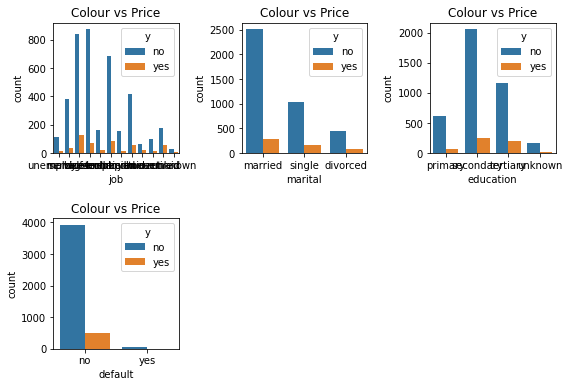

In [46]:
count_plots(['job','marital','education','default'])

In [15]:
for i in range(1, 11):
    

1

no     4000
yes     521
Name: y, dtype: int64
-----------------------


c:\UserPrograms\Python39\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


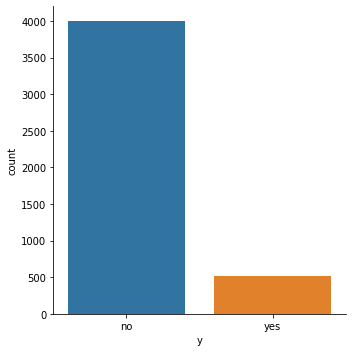

In [41]:
#sns.histplot(data=dataset_bank, x='age', hue='y', multiple="stack")
y_values_distribution = dataset_bank["y"].value_counts()
print(y_values_distribution)
print("-----------------------")
sns.catplot(x='y', data=dataset_bank, kind='count',ax='ax_count_plots_1')
plt.show()